In [1]:
import trig_poly_v0 as trig_poly
import dual_certificates_v0 as dual_certificates
import test_data
import numpy as np
import plt_util
import phase_transition
from matplotlib import pyplot as plt

%matplotlib inline
figsize = (8,6)

In [ ]:
reload(test_data)
reload(dual_certificates)
reload(trig_poly)
reload(plt_util)

m = 10
fc = 20
min_separation = 0.45/fc
#N = int(1.0/min_separation-1)
N = m
# N = 5
kernel = trig_poly.TrigPoly.dirichlet(fc)

epsi = 0.001/fc
points = 200
delta_resolution = 200
delta_start = 0.45/fc
delta_end = 0.8/fc
ys = np.zeros((points, delta_resolution, delta_resolution))
ymax = np.zeros((delta_resolution, delta_resolution))
for i_minus in range(delta_resolution):
    for i_plus in range(delta_resolution):
        delta_minus = delta_start + i_minus*(delta_end-delta_start)/delta_resolution
        delta_plus = delta_start + i_plus*(delta_end-delta_start)/delta_resolution
        separation = [delta_minus, delta_plus]
        support = test_data.exact_supports(N, separation)
        sign_pattern = test_data.uniform_sign_pattern_multidim(N, m, orthogonal= True, sparse = True)
        interpolator,coeffs, _, kernel_1 = dual_certificates.interpolate_multidim_with_derivative(support, sign_pattern, kernel)
        ts = np.linspace(support[0], support[2], points)        
        values = interpolator(ts)
        ys[:, i_minus, i_plus] = np.linalg.norm(values[1:, :].T, axis=1)       
        ymax[i_minus, i_plus] = max(ys[np.logical_and(abs(ts-support[1])>epsi, abs(ts-support[2])>epsi), i_minus, i_plus ] )
        

#         qs = [1,2,3]
#         extension = min_separation
#         ts = np.linspace(max(support[min(qs)-1] - extension,0), min(support[max(qs)-1] + extension , 1.0), points)
#         plt_util.plot_individual_magnitude(interpolator, support, qs=qs, ts=ts, plot_Nt = True)

        

0.999996475397


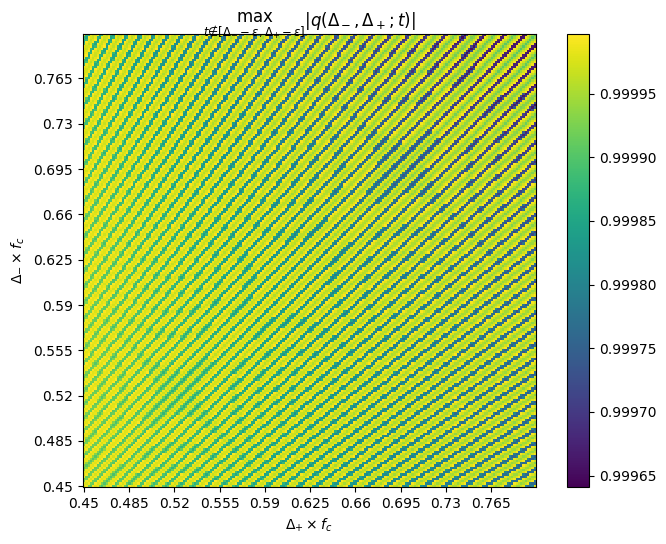

In [56]:
plt.figure(figsize=figsize, dpi=100)
ax = plt.gca()
plt.imshow(ymax)
plt.ylabel(r'$\Delta_{-}\times f_c$')
plt.xlabel(r'$\Delta_{+}\times f_c$')
plt.title(r'$\max_{t\notin[\Delta_{-}-\epsilon, \Delta_{+}-\epsilon]} |q(\Delta_-,\Delta_+;t)|$')
plt.colorbar()     
plt.locator_params(nbins=10)
plt.gca().set_xticklabels([fc*(delta_start + i_minus*(delta_end-delta_start)/delta_resolution) for i_minus in plt.gca().get_xticks()])
plt.gca().set_yticklabels([fc*(delta_start + i_plus*(delta_end-delta_start)/delta_resolution) for i_plus in plt.gca().get_yticks()])
plt.gca().invert_yaxis()
print(np.amax(ymax))